In [2]:
from Portfolio import ALL_WEATHER, BERNSTEIN, MVO, SNP500
from Portfolio import *
from PortfolioConfig import *

# 1. Running example portfolios

In [11]:
all_weather_df = ALL_WEATHER.generate_df()
all_weather_df

,date,snp500,us_bonds,inter_us_bonds,gold,commodities
0,2007-01-11,1423.82,88.45,99.92,60.63,22.65
1,2007-01-12,1430.73,88.04,99.93,62.17,23.18
2,2007-01-16,1431.90,88.20,99.83,61.97,22.65
3,2007-01-17,1430.62,87.96,99.82,62.64,22.85
4,2007-01-18,1426.37,88.23,99.91,62.26,22.61
...,...,...,...,...,...,...
4285,2024-01-22,4850.43,94.65,116.58,187.22,22.03
4286,2024-01-23,4864.60,93.90,116.45,187.95,22.15
4287,2024-01-24,4868.55,93.35,116.26,186.40,22.34
4288,2024-01-25,4894.16,93.96,116.64,187.14,22.51


In [12]:
all_weather_weights = ALL_WEATHER.generate_weights()
all_weather_weights

,snp500,us_bonds,inter_us_bonds,gold,commodities
0,0.3,0.4,0.15,0.075,0.075


In [13]:
all_weather_consolidated = ALL_WEATHER.generate_consolidated()
all_weather_consolidated

,date,all_weather
0,2007-01-11,1695.47
1,2007-01-12,1704.05
2,2007-01-16,1704.55
3,2007-01-17,1703.89
4,2007-01-18,1699.38
...,...,...
4285,2024-01-22,5270.91
4286,2024-01-23,5285.05
4287,2024-01-24,5286.90
4288,2024-01-25,5314.41


In [14]:
bernstein_df = BERNSTEIN.generate_df()
bernstein_df

,date,us_bonds,snp500,foreign_large_cap,us_small_cap
0,2007-07-26,87.03,1482.66,47.90,71.25
1,2007-07-27,87.28,1458.95,47.17,69.60
2,2007-07-30,87.03,1473.91,47.96,70.82
3,2007-07-31,87.66,1455.27,47.90,69.95
4,2007-08-01,87.13,1465.81,48.10,70.31
...,...,...,...,...,...
4150,2024-01-22,94.65,4850.43,46.90,210.66
4151,2024-01-23,93.90,4864.60,46.82,209.92
4152,2024-01-24,93.35,4868.55,47.11,208.29
4153,2024-01-25,93.96,4894.16,47.23,209.83


In [15]:
bernstein_weights = BERNSTEIN.generate_weights()
bernstein_weights

,us_bonds,snp500,foreign_large_cap,us_small_cap
0,0.25,0.25,0.25,0.25


In [16]:
bernstein_consolidated = BERNSTEIN.generate_consolidated()
bernstein_consolidated

,date,bernstein
0,2007-07-26,1688.84
1,2007-07-27,1663.00
2,2007-07-30,1679.72
3,2007-07-31,1660.78
4,2007-08-01,1671.35
...,...,...
4150,2024-01-22,5202.64
4151,2024-01-23,5215.24
4152,2024-01-24,5217.30
4153,2024-01-25,5245.18


In [17]:
mvo_df = MVO.generate_df()
mvo_df

,date,us_bonds,snp500
0,2002-08-02,83.85,864.24
1,2002-08-05,84.22,834.60
2,2002-08-06,83.50,859.57
3,2002-08-07,83.70,876.77
4,2002-08-08,83.70,905.46
...,...,...,...
5408,2024-01-22,94.65,4850.43
5409,2024-01-23,93.90,4864.60
5410,2024-01-24,93.35,4868.55
5411,2024-01-25,93.96,4894.16


In [18]:
mvo_weights = MVO.generate_weights()
mvo_weights

,us_bonds,snp500
0,0.039151,0.960849


In [19]:
mvo_consolidated = MVO.generate_consolidated()
mvo_consolidated

,date,mvo
0,2002-08-02,948.09
1,2002-08-05,918.82
2,2002-08-06,943.07
3,2002-08-07,960.47
4,2002-08-08,989.16
...,...,...
5408,2024-01-22,4945.08
5409,2024-01-23,4958.50
5410,2024-01-24,4961.90
5411,2024-01-25,4988.12


# 2. Using with backtest engine

In [3]:
import sys
sys.path.insert(0, '..')
from backtest.backtest import Backtest

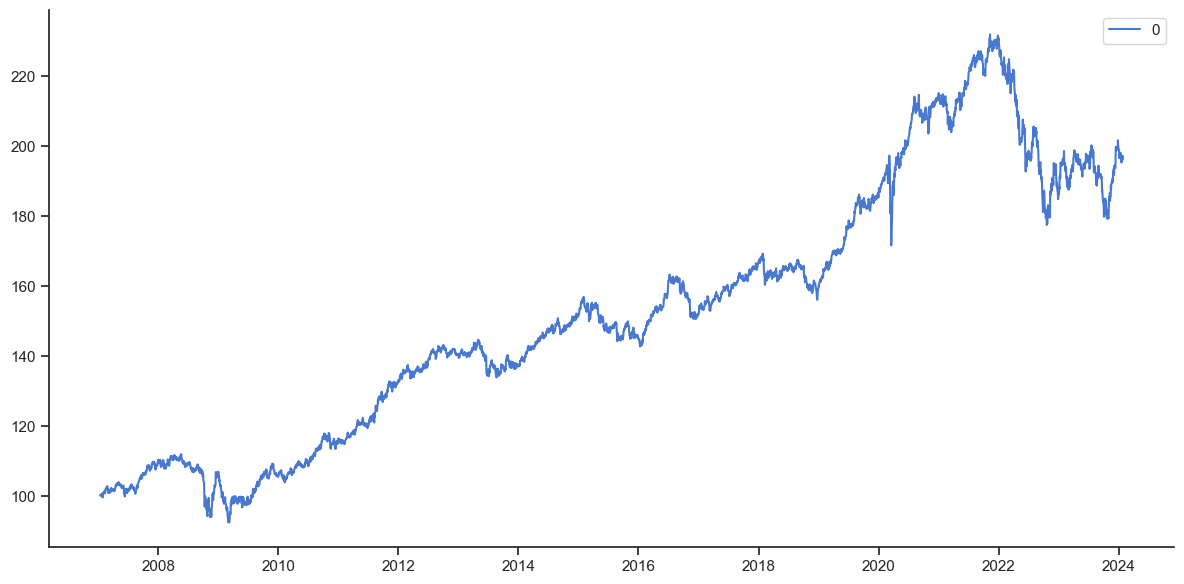

Sharpe Ratio: 0.16820096634141748
Max Drawdown: -0.23465859915173554
PnL: 0.9705288964799212
Beta: nan


{'Portfolio Returns': [nan,
  0.0032767639978713288,
  -0.0011339477731486052,
  0.00010149181659360729,
  -0.0007708747308746959,
  0.0016346672677921613,
  -0.0008215320783384937,
  0.0024110681818830804,
  0.0020488173297242697,
  -0.007543076545293647,
  0.00031147801907183695,
  -0.003161571986547479,
  0.004875414880643447,
  0.007234982238608206,
  -0.000791458901765327,
  0.0009807450778434618,
  0.0002403777662232099,
  0.002854163327927956,
  0.0006768218594244175,
  0.002796023690957344,
  -0.0035720916411466908,
  -0.003934771238098633,
  0.0029212628122844753,
  0.006335207453210115,
  0.0017620863406412556,
  0.002409471446986486,
  -0.0002727164497567185,
  0.002910466828421382,
  -0.0017605009600731385,
  0.0032171730297648974,
  0.0031630053182274526,
  -0.00883868197251126,
  0.0022068592151314177,
  -0.004618032528937707,
  -0.004046752087620302,
  -0.004149179843059047,
  0.0054637397514604,
  0.0022321874589437797,
  0.0021437597376758872,
  -0.005790761391157474,


In [4]:
# Running all weather with all data.
ALL_WEATHER.backtest(Backtest())

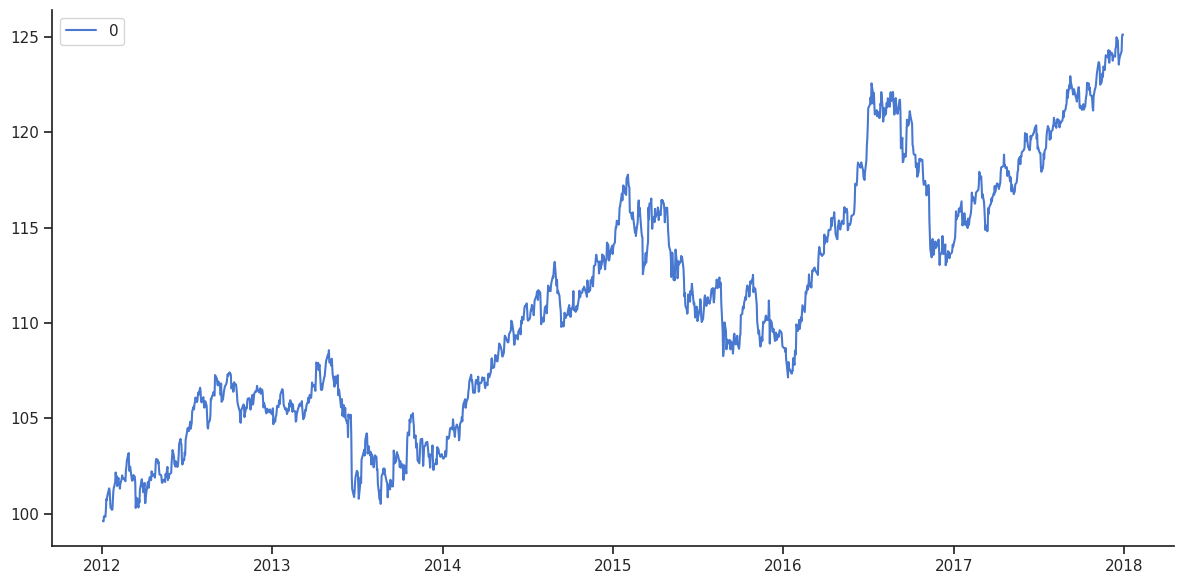

Sharpe Ratio: 0.16432695484325127
Max Drawdown: -0.09030349020109746
PnL: 0.2512301536567594
Beta: nan


{'Portfolio Returns': [nan,
  -0.003799025236181364,
  -0.00030294377636887204,
  0.002732289938195018,
  -0.00029370629496273406,
  0.0034978510546180173,
  0.0058781540316946435,
  -0.0006610003820185618,
  0.002111583043022047,
  0.004049599524559644,
  -0.0010663253705164746,
  -0.004310565099075261,
  -0.004600202165621809,
  -0.0011567703399183002,
  0.0001324856660518016,
  0.004883590208806604,
  0.004505107622735472,
  0.001906709061600165,
  0.002910117719573818,
  0.005037662714703995,
  -0.002797464196512478,
  0.0010689996394090628,
  -0.005253125785734596,
  0.004190009552768828,
  -0.0036433135988701926,
  0.0007456183177967034,
  -0.0025895116308052107,
  0.002375972697643817,
  0.0027561262583304046,
  0.0016957985071570623,
  -0.0014867000775382888,
  -4.01237150286701e-05,
  0.00016881799417756694,
  -0.0016598419911371572,
  0.005917891808052955,
  0.0015375697797857801,
  0.003112130917822537,
  0.003416905439899332,
  0.0004841417877109981,
  -0.008351301705127639

In [22]:
# Running all weather with a from 2012 to 2018 only
ALL_WEATHER.backtest(Backtest(), start="2012-01-01", end="2018-01-01")

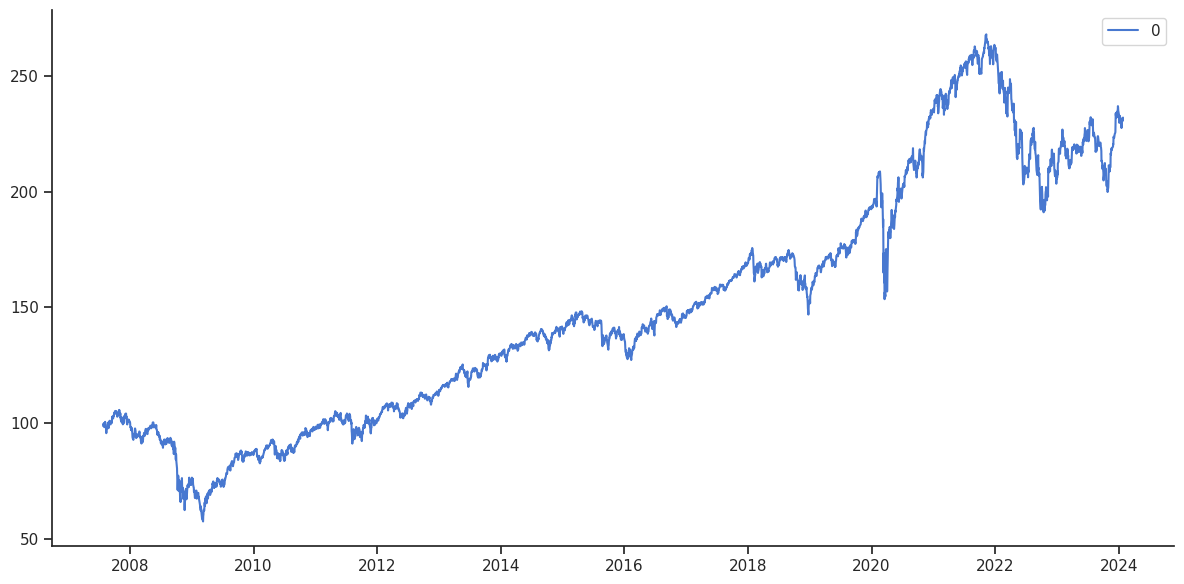

Sharpe Ratio: 0.20748795034626377
Max Drawdown: -0.45637473636137615
PnL: 1.3199844851662088
Beta: nan


{'Portfolio Returns': [nan,
  -0.01287923357673712,
  0.010416568440223262,
  -0.004735864631020936,
  0.0026296134216007017,
  0.0034468516250077408,
  -0.01706228835868126,
  0.009852581102432895,
  0.0037267479192964192,
  0.00971273178550705,
  -0.020275043554582428,
  -0.0020269334347574053,
  0.00017681750498760307,
  -0.01212573572198461,
  -0.015356481509396641,
  0.006096061269812436,
  0.01389741628821961,
  0.0013756837572663494,
  0.0022132056714941895,
  0.012077848037824107,
  -0.0004806929876633448,
  0.011386376756194305,
  -0.00588131042790338,
  -0.01806619841032417,
  0.017478787315795413,
  -0.002699225016388501,
  0.012302867104457826,
  0.005734485188867211,
  -0.007622462974931715,
  0.002321846846230602,
  -0.008616905879473225,
  -0.001751580763095395,
  0.011320499844829274,
  -0.0020222062227340243,
  0.002594252801400021,
  -6.496291864593884e-05,
  -0.005626114041614394,
  0.022468775042739725,
  0.004702058161200812,
  -0.009439665722944024,
  0.0059980170

In [11]:
BERNSTEIN.backtest(Backtest())

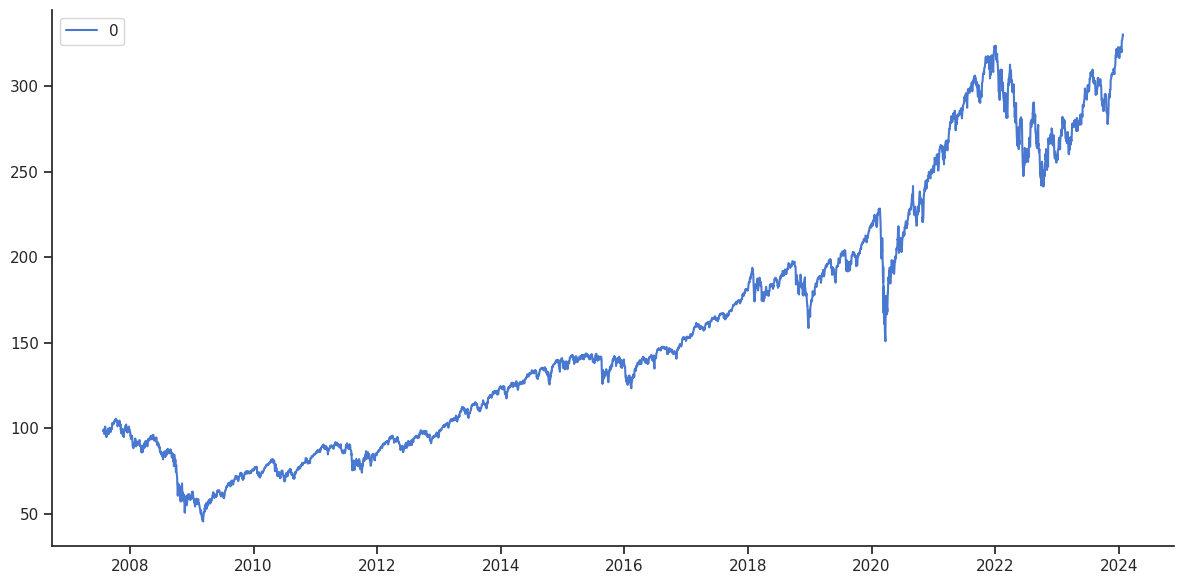

Sharpe Ratio: 0.3120472795834843
Max Drawdown: -0.5677538894035716
PnL: 2.2987805700565564
Beta: nan


{'Portfolio Returns': [nan,
  -0.015991528738888205,
  0.010253949758388003,
  -0.01264663378360964,
  0.007242642258824761,
  0.004359364446961056,
  -0.02658606167640276,
  0.024151117189789684,
  0.006159422758521993,
  0.014071821820127228,
  -0.029649613686902776,
  0.00037850374030523604,
  -0.0004953083294351179,
  -0.018156539933375626,
  -0.013907776858693044,
  0.003248738181559574,
  0.024566525186534127,
  -0.00026972073530029395,
  0.0010860917989692354,
  0.011712919453811699,
  -0.001072353097871015,
  0.011535042735042689,
  -0.008503619784097194,
  -0.023473026131893504,
  0.021921863218743898,
  -0.00418101328086562,
  0.011216761340248516,
  0.010468184994470775,
  -0.011501121241825785,
  0.004251879724782581,
  -0.016908457610496752,
  -0.0012727460355680398,
  0.01363229317352066,
  4.757082956730052e-05,
  0.00841963630433007,
  0.00020216314565857374,
  -0.005120431194205799,
  0.029208004605018045,
  0.00608640724315368,
  -0.00672321667985587,
  0.004609053497

In [12]:
SNP500.backtest(Backtest(), start="2007-07-26")

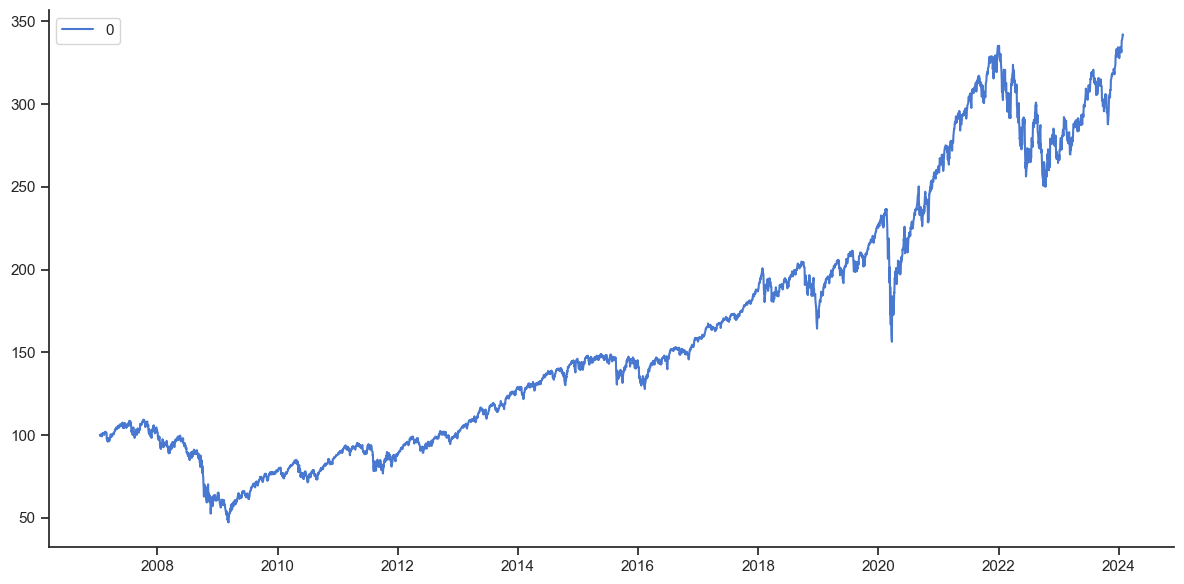

Sharpe Ratio: 0.31231755723871046
Max Drawdown: -0.5677538894035714
PnL: 2.418513625911266
Beta: nan


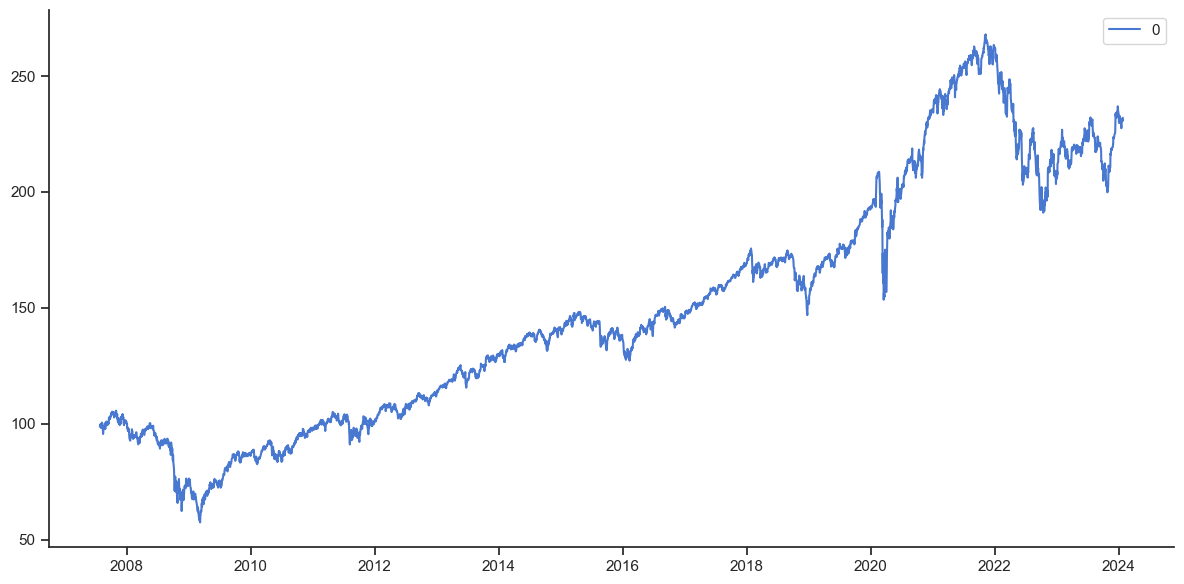

Sharpe Ratio: 0.20748795034626377
Max Drawdown: -0.45637473636137615
PnL: 1.3199844851662088
Beta: nan


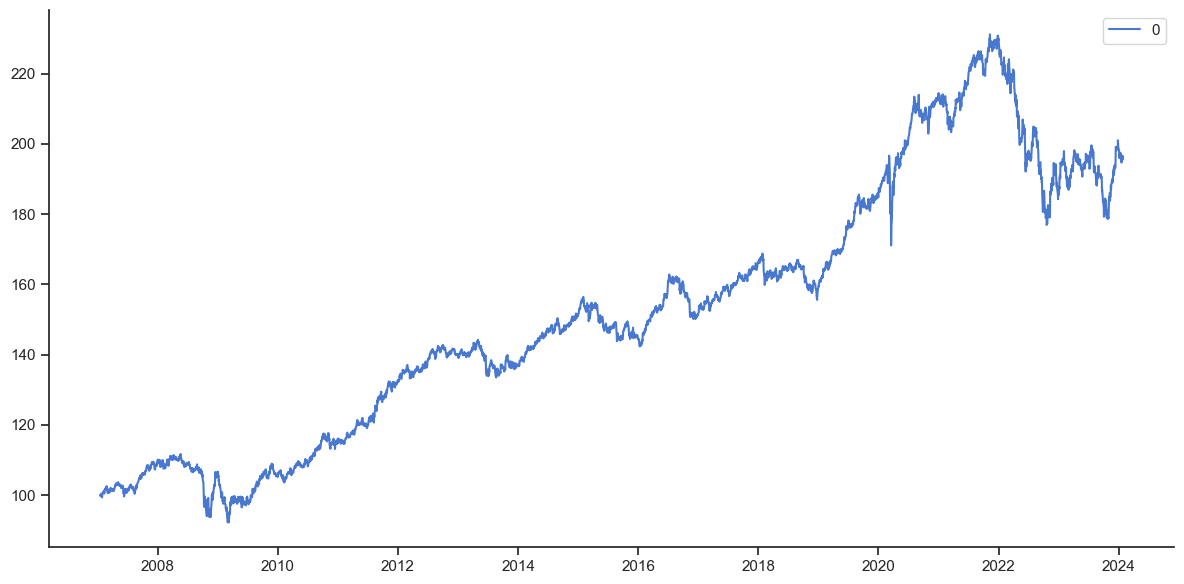

Sharpe Ratio: 0.16592052974798557
Max Drawdown: -0.23465859915173645
PnL: 0.9640930271600523
Beta: nan


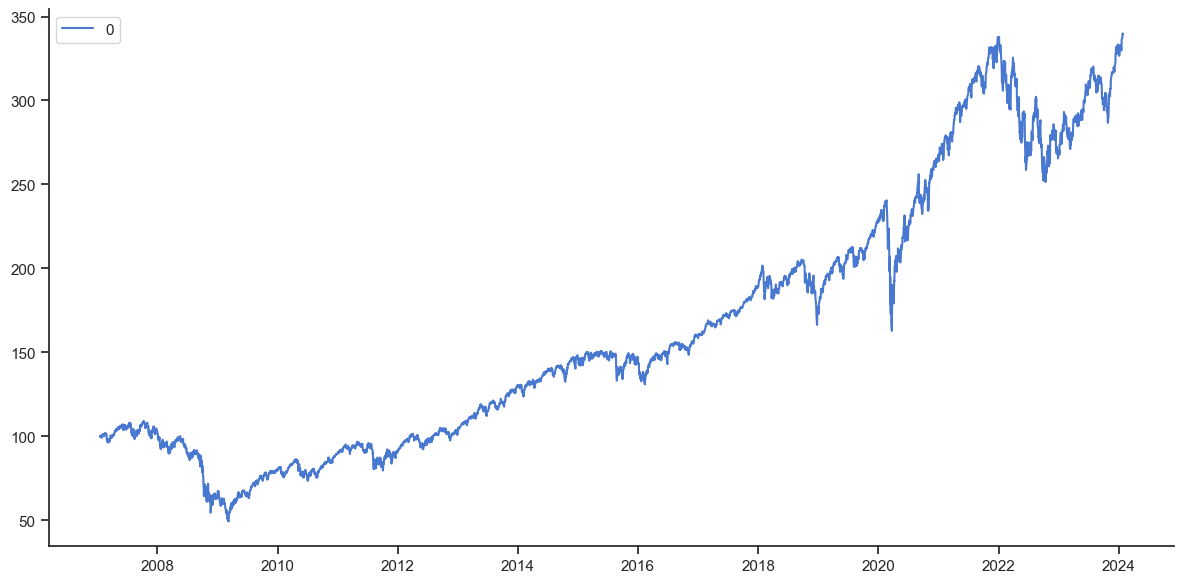

Sharpe Ratio: 0.3000010246911862
Max Drawdown: -0.54755292672808
PnL: 2.3971058357620163
Beta: nan


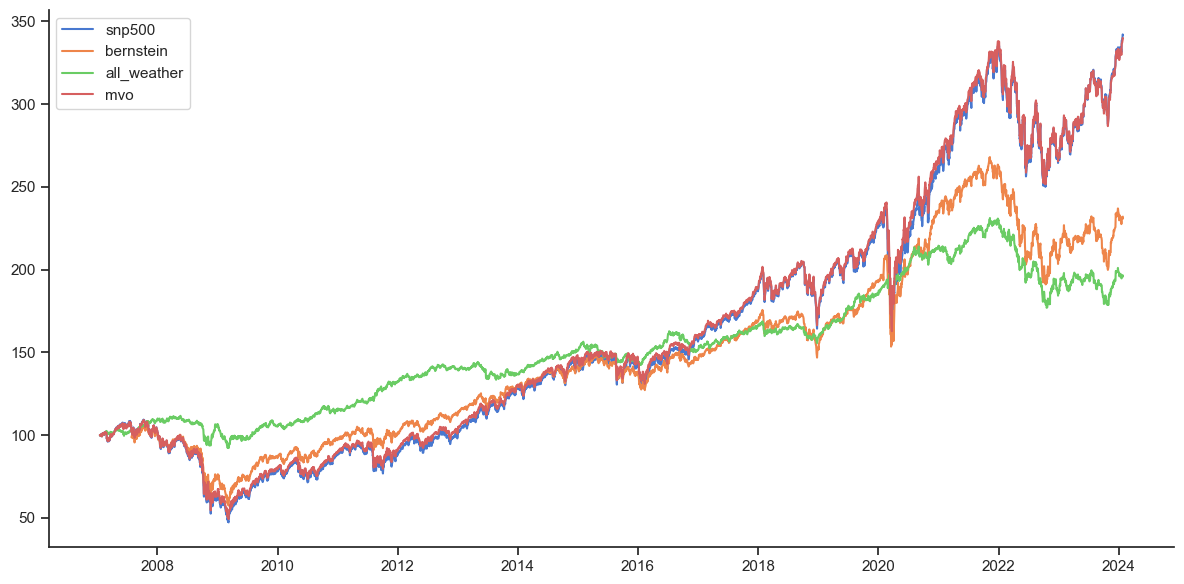

In [5]:
Backtest().run_multiple(portfolios=[SNP500, BERNSTEIN, ALL_WEATHER, MVO], start="2007-01-12")

# 3. using portfolio with WRDS non-downloaded data

In [14]:
# We set download=False if want to run a portfolio but not download the data from WDRS to our local directory.

test_config = PortfolioConfig("test", {
    "snp500" : 0.5, # This is a downloaded data already available on ./data
    "GOOG" : 0.5 # This is not a downloaded data
}, download=False) 

WRDS recommends setting up a .pgpass file.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [15]:
# Create portfolio
test_portfolio = Portfolio(test_config)

In [16]:
test_df = test_portfolio.generate_df()
test_df

,date,snp500,GOOG
0,2014-03-27,1849.04,558.46
1,2014-03-28,1857.62,559.99
2,2014-03-31,1872.34,556.97
3,2014-04-01,1885.52,567.16
4,2014-04-02,1890.90,567.00
...,...,...,...
2471,2024-01-22,4850.43,147.71
2472,2024-01-23,4864.60,148.68
2473,2024-01-24,4868.55,150.35
2474,2024-01-25,4894.16,153.64


In [17]:
df1 = test_config.downloaded["GOOG"]
date_series = pd.to_datetime(df1["datadate"])
price = df1["prccd"]
r1 = pd.DataFrame(
        {"date" : date_series, "goog" : price})
df2 = pd.read_csv("../data/snp500.csv")
date_series = pd.to_datetime(df2["datadate"])
price = df2["prccd"]
r2 = pd.DataFrame(
        {"date" : date_series, "snp" : price})

In [18]:
r1

,date,goog
0,2014-03-27,558.46
1,2014-03-28,559.99
2,2014-03-31,556.97
3,2014-04-01,567.16
4,2014-04-02,567.00
...,...,...
2474,2024-01-25,153.64
2475,2024-01-26,153.79
2476,2024-01-29,154.84
2477,2024-01-30,153.05


In [19]:
r1.dtypes

date    datetime64[ns]
goog           float64
dtype: object

In [20]:
r2

,date,snp
0,1984-02-10,156.30
1,1984-02-13,154.95
2,1984-02-14,156.61
3,1984-02-15,156.25
4,1984-02-16,156.13
...,...,...
10096,2024-01-22,4850.43
10097,2024-01-23,4864.60
10098,2024-01-24,4868.55
10099,2024-01-25,4894.16


In [21]:
r2.dtypes

date    datetime64[ns]
snp            float64
dtype: object

## 

In [22]:
base = pd.merge(r1, r2, how = "inner", on = "date")
base.tail(100)

,date,goog,snp
2376,2023-09-05,136.71,4496.83
2377,2023-09-06,135.37,4465.48
2378,2023-09-07,136.20,4451.14
2379,2023-09-08,137.20,4457.49
2380,2023-09-11,137.74,4487.46
...,...,...,...
2471,2024-01-22,147.71,4850.43
2472,2024-01-23,148.68,4864.60
2473,2024-01-24,150.35,4868.55
2474,2024-01-25,153.64,4894.16


In [23]:
# We set download=False if want to run a portfolio but not download the data from WDRS to our local directory.
# NOTE: wrds data source does not take into account stock splits

test_config = PortfolioConfig("test", {
    "snp500" : 0.5, # This is a downloaded data already available on ./data
    "GOOG" : 0.5 # This is not a downloaded data
}, download=False) 

WRDS recommends setting up a .pgpass file.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [24]:
# Create portfolio
test_portfolio = Portfolio(test_config)
test_df = test_portfolio.generate_df()
test_df

,date,snp500,GOOG
0,2014-03-27,1849.04,558.46
1,2014-03-28,1857.62,559.99
2,2014-03-31,1872.34,556.97
3,2014-04-01,1885.52,567.16
4,2014-04-02,1890.90,567.00
...,...,...,...
2471,2024-01-22,4850.43,147.71
2472,2024-01-23,4864.60,148.68
2473,2024-01-24,4868.55,150.35
2474,2024-01-25,4894.16,153.64


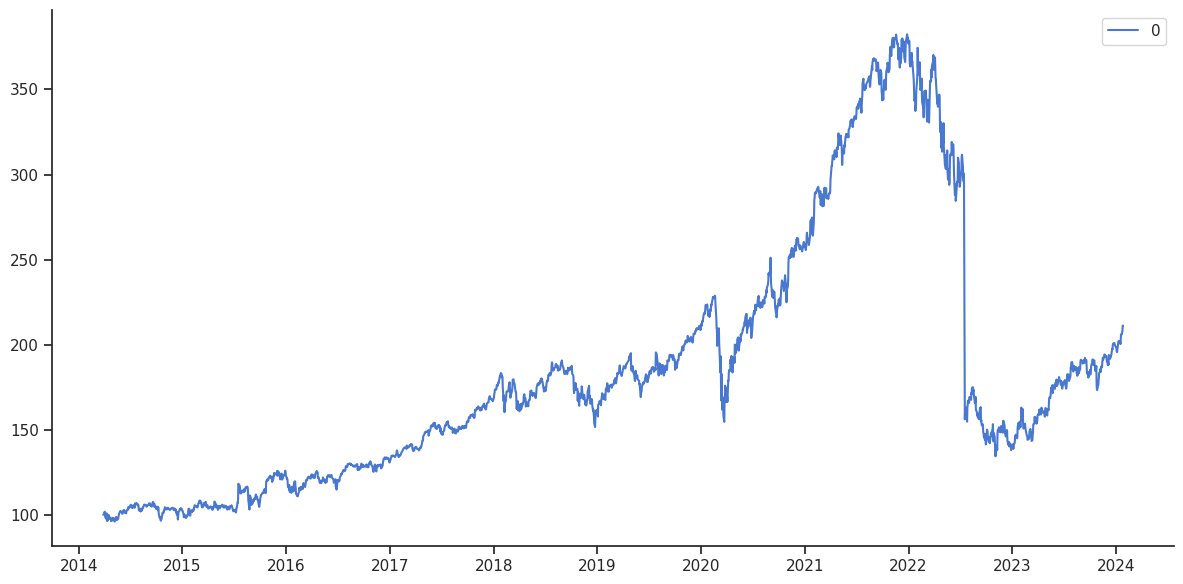

Sharpe Ratio: 0.3316660691474757
Max Drawdown: -0.6478686282397983
PnL: 1.1135266711692888
Beta: nan


{'Portfolio Returns': [nan,
  0.003689961358976257,
  0.0012655822558945706,
  0.01266736982134864,
  0.0012856084700261228,
  0.0018530018879059362,
  -0.029612611314284998,
  -0.009968734827030423,
  0.017437873586623187,
  0.01378490566253654,
  -0.030995780722475663,
  -0.014309886095670576,
  0.0059179034002926345,
  0.007059268137089791,
  0.02397884486211954,
  -0.017681511186412036,
  -0.005088759112269969,
  0.007900927789412204,
  -0.008464401088610518,
  -0.0008305087485947493,
  -0.012597981160901661,
  0.0025576048041063837,
  0.012580540079541458,
  0.0005106013773734652,
  0.004380930054737442,
  -0.0038924299276604235,
  0.0008219514480442558,
  -0.016496604436567308,
  -0.0022195226633608955,
  0.00033286366160933945,
  0.008323345508550961,
  0.015622315067478909,
  0.0032019156746270205,
  -0.00839077893717588,
  -0.011013368244893906,
  0.0024985040083841392,
  0.009826286707929066,
  -0.002388857861918836,
  0.012712729035610049,
  0.006858937301251644,
  0.0091325

In [25]:
test_portfolio.backtest(Backtest())

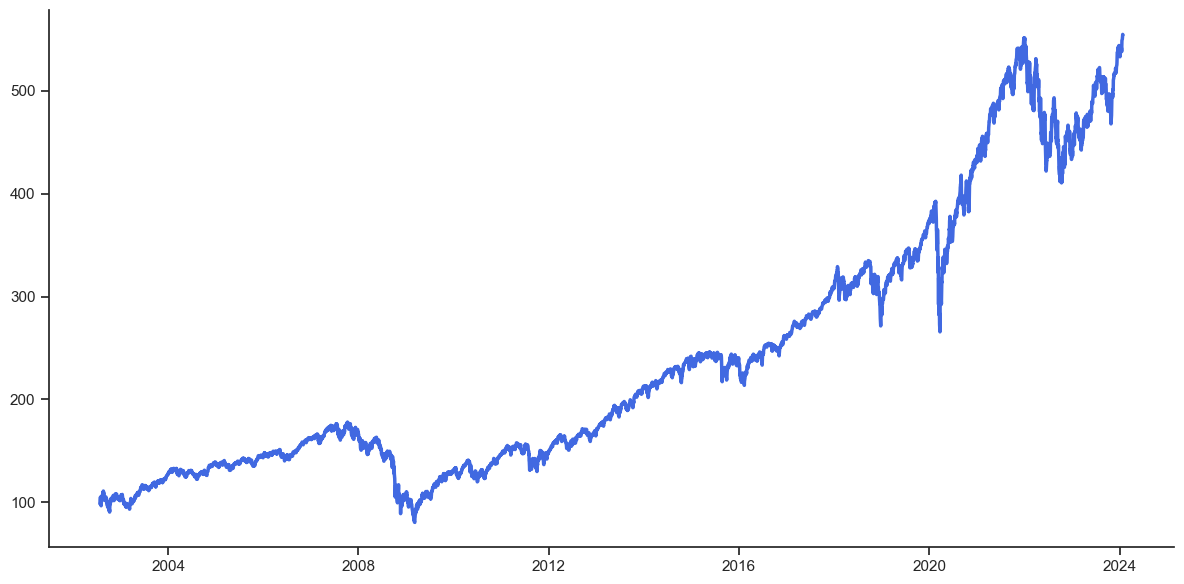

Sharpe Ratio: 0.3429935492343667
Max Drawdown: -0.5475529267280812
PnL: 4.544103474142241
Beta: nan


In [58]:
MVO.backtest(Backtest(MVO.generate_weights()))